## Significance Calculation
To evaluate the significance of features in the data, a two-step process involving normalization and Principal Component Analysis (PCA) was performed. 
### Importing libraries and dependencies

In [4]:
# preprocessing and feature generation
import pandas as pd
import numpy as np

# feature significance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib.pyplot as plt

Dependent features and labels were removed from the dataset leaving only independent features. Next, the independent data features were standardized to have zero mean and unit variance, ensuring fair comparison among them.

In [6]:
# load combined data
normal_badminton_data = pd.read_csv('normal_data/normal_badminton_data.csv')
# determine x features
X_normal_features = normal_badminton_data.drop(columns=['OBSERVATION GROUP NUMBER',
                                            'SHUTTLECOCK POSITIION IN AIR(X) metres', 
                                            'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
                                            'SHUTTLECOCK POSITIION IN AIR(Z) metres'])
# Standardize the data
scaler = StandardScaler()
X_features_norm = scaler.fit_transform(X_normal_features)

PCA model was then fitted to the data extracting the principal components that capture the maximum variance in the dataset. To assess the significance of each feature, the total sum of absolute loadings for each feature across all principal components was computed, which represented the absolute weightage or coefficients that determine the contribution of each feature to the principal components. The relative contribution of each feature to the total loadings was then determined by dividing the total loadings by the sum of all total loadings.

Feature INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE): Significance = 0.18630526369542455
Feature HUMAN PLAYER POSITION (Z) metres: Significance = 0.16327184121198018
Feature OBSERVATION NUMBER: Significance = 0.16309277875053643
Feature INITIAL SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE): Significance = 0.15241979764905103
Feature INITITAL VELOCITY OF SHUTTELCOCK(m/s): Significance = 0.12798943580321234
Feature HUMAN PLAYER POSITION (Y) metres: Significance = 0.12769003629456316
Feature HUMAN PLAYER POSITION (X) metres: Significance = 0.07923084659523232


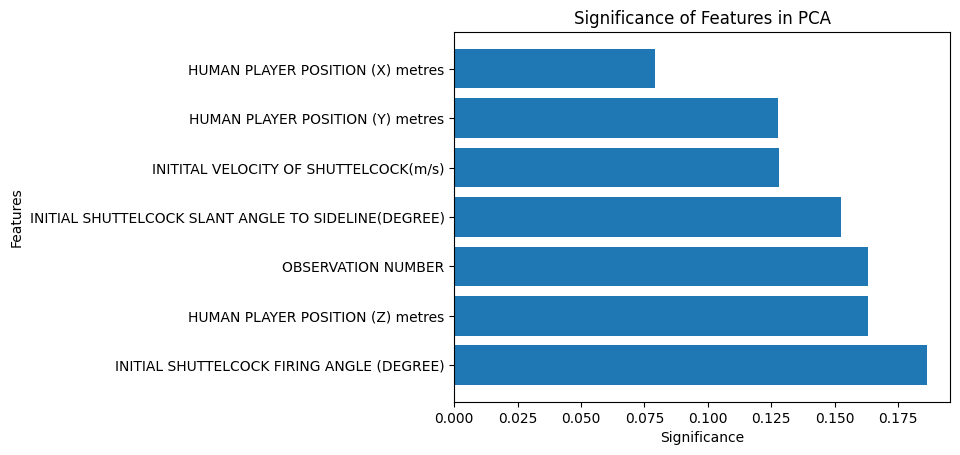

In [7]:
# instantiate PCA object, fit model
pca = PCA()
pca.fit(X_features_norm)

# loadings refer to the coefficients or weights that determine the contribution of each feature to the principal components
# Get the absolute loadings for each feature in each principal component
absolute_loadings = np.abs(pca.components_)
# Calculate the total sum of absolute loadings for each feature across all principal components
total_loadings = np.sum(absolute_loadings, axis=0)

# Calculate the relative contribution of each feature to the total loadings
relative_contribution = total_loadings / np.sum(total_loadings)

# Sort the features based on their relative contribution
sorted_features = np.argsort(relative_contribution)[::-1]
feature_names = X_normal_features.columns
# Print the significance of each feature
for feature_idx in sorted_features:
    print(f"Feature {feature_names[feature_idx]}: Significance = {relative_contribution[feature_idx]}")

# Plot the significance of each feature as a sideways bar chart
plt.barh(range(len(sorted_features)), relative_contribution[sorted_features])
plt.ylabel('Features')  # Set the y-axis label to Features
plt.xlabel('Significance')  # Set the x-axis label to Significance
plt.title('Significance of Features in PCA')
plt.yticks(range(len(sorted_features)), feature_names[sorted_features])  # Set y-axis ticks and labels
plt.show()